In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [51]:
df = pd.read_csv('NLP\data\spam.csv', encoding='ISO-8859-1') #csv contains some invalid characters
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [53]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.shape

(5572, 2)

In [55]:
#rename columns
df.columns = ['labels', 'data']

<AxesSubplot:>

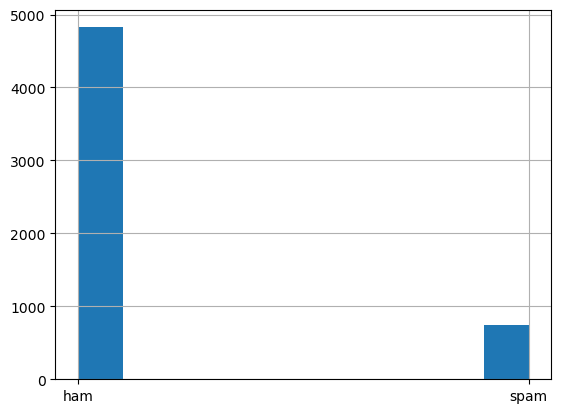

In [56]:
df['labels'].hist()

In [57]:
#create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].values

In [58]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

In [60]:
featurizer = TfidfVectorizer(decode_error='ignore') #decode_error='ignore' is used to ignore invalid characters
X_train = featurizer.fit_transform(X_train)
X_test = featurizer.transform(X_test)

#feauturizer = CountVectorizer(decode_error='ignore')
#X_train = featurizer.fit_transform(X_train)
#X_test = featurizer.transform(X_test)

In [61]:
X_train

<3733x7030 sparse matrix of type '<class 'numpy.float64'>'
	with 49871 stored elements in Compressed Sparse Row format>

In [62]:
model = MultinomialNB()
model.fit(X_train, Y_train)
print("train score:", model.score(X_train, Y_train))
print("test score:", model.score(X_test, Y_test))

train score: 0.970800964371819
test score: 0.9619358346927678


In [63]:
Ptrain = model.predict(X_train)
Ptest = model.predict(X_test)
print("train f1 score:", f1_score(Y_train, Ptrain))
print("test f1 score:", f1_score(Y_test, Ptest))

train f1 score: 0.88113413304253
test f1 score: 0.8241206030150754


In [64]:
train_probs = model.predict_proba(X_train)[:,1]
test_probs = model.predict_proba(X_test)[:,1]
print("train roc-auc score:", roc_auc_score(Y_train, train_probs))
print("test roc-auc score:", roc_auc_score(Y_test, test_probs))

train roc-auc score: 0.993808797355708
test roc-auc score: 0.9825505232047288


In [65]:
cm = confusion_matrix(Y_test, Ptest)
cm

array([[1605,    0],
       [  70,  164]], dtype=int64)

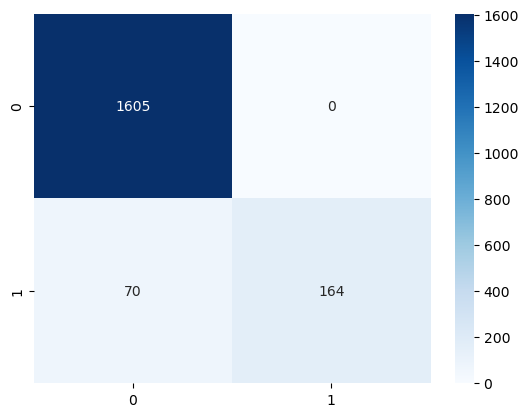

In [66]:
#plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues');

In [74]:
#alternative way to plot confusion matrix
def plot_cm(cm, labels=['ham', 'spam']):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks([0.5, 1.5], labels)
    plt.yticks([0.5, 1.5], labels)
    
    plt.show()
    

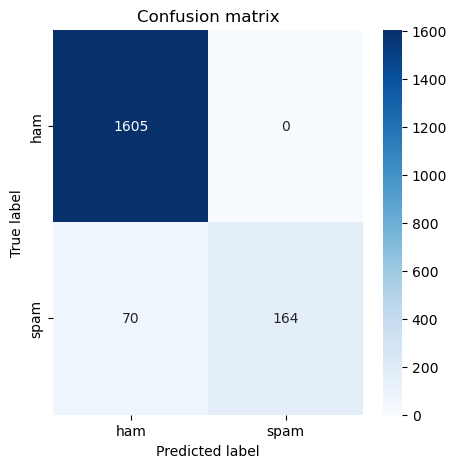

In [75]:
plot_cm(cm)

In [78]:
#visualize 

def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

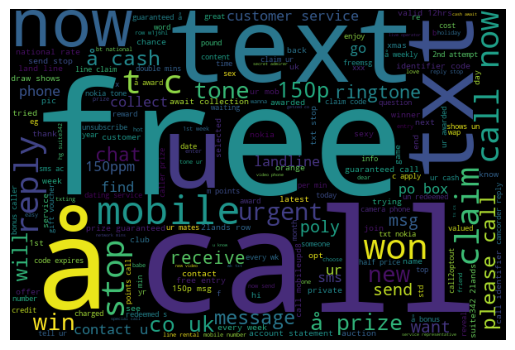

In [79]:
visualize('spam')

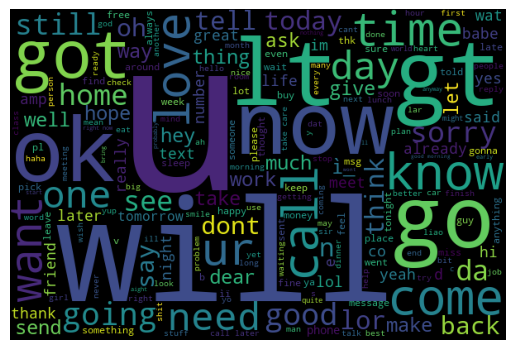

In [80]:
visualize('ham')

In [81]:
#what we are getting wrong
X =featurizer.transform(df['data'])
df["predictions"] = model.predict(X)

In [82]:
#things that should be spam but we classified as ham
spam_errors = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in spam_errors:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery
-PLS STOP bootydelious (32/F) is inviting you to be her friend. Reply YES-434 or NO-434 See her: www.SMS.ac/u/bootydelious STOP? Send STOP FRND to 62468
BangBabes Ur order is on the way. U SHOULD receive a Se

In [83]:
#things that should not be spam but we classified as spam

In [84]:
no_spam_errors = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in no_spam_errors:  
    print(msg)
    